In [1]:
import gentrl
import matplotlib.pyplot as plt
from utilities.candiconfig import CandiConfig
import pickle

### load the saved model

In [2]:
# config = Config(smiles_format=2, topn_fp_features=5, mode='threshold', max_fp_features=2048, threshold=0.3, morgan_radius=2)
# with open(config.FpsSOM_model, 'rb') as infile:
#      fps_som = pickle.load(infile)

### train the model using LA and sampled zinc data

In [3]:
config = CandiConfig(smiles_format=2, topn_fp_features=5, mode='threshold', max_fp_features=2048, threshold=0.3, morgan_radius=2)
fps_som = gentrl.FpsSOM(config)

In [13]:
size=10
fps_som.size= 10
fps_som.train_som(size)

calculating the idxs...
The top 334 indexes with the largest feature frequency gap:
indexs:  [   1    4   18   20   21   27   29   36   39   43   44   62   64   67
   70   76   77   82   84   92   98  104  107  109  127  136  145  147
  158  159  162  168  173  180  181  190  192  193  197  200  201  209
  218  241  244  247  250  251  252  254  258  259  268  275  276  281
  283  285  302  306  311  324  354  357  361  369  378  381  386  403
  437  439  443  449  452  461  465  471  476  478  482  486  489  498
  499  505  509  513  524  525  529  532  536  539  541  546  548  553
  556  559  561  567  573  575  578  581  594  599  602  605  621  622
  625  627  632  633  634  636  639  644  651  656  677  681  686  689
  690  697  708  711  723  729  735  736  751  755  775  781  786  790
  791  798  817  818  856  866  870  873  875  886  888  892  893  903
  909  911  919  926  927  936  944  950  961  962  966  967  975  979
  990  991  992  993 1005 1006 1010 1041 1046 1050 1066

In [14]:
print(fps_som.size)

10


### draw the heatmap

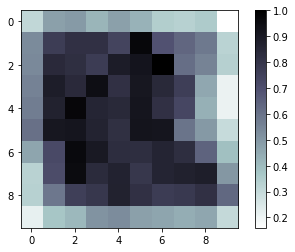

In [15]:
heatmap = fps_som.som.distance_map()
plt.imshow(heatmap, cmap='bone_r')
plt.colorbar()

### draw the pie map

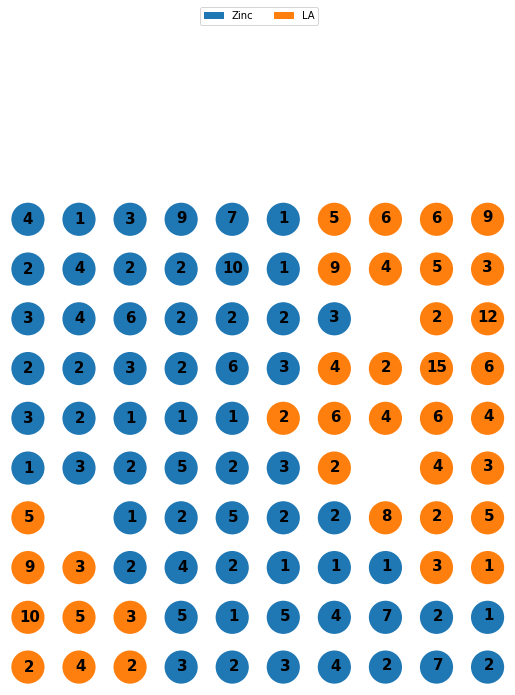

In [16]:
label_name_map_number = {"LA":1,"Zinc":0}
class_names = ["Zinc", "LA"]

from matplotlib.gridspec import GridSpec
plt.figure(figsize=(9, 9))
the_grid = GridSpec(fps_som.size, fps_som.size)
for position in fps_som.winmap.keys():
    label_fracs = [fps_som.winmap[position][label] for label in [0,1]]
    plt.subplot(the_grid[position[0], position[1]], aspect=1)
    patches, texts = plt.pie(label_fracs)
    plt.text(position[0]/100, position[1]/100,  str(len(list(fps_som.winmap[position].elements()))),
              color='black', fontdict={'weight': 'bold',  'size': 15},
              va='center',ha='center')
plt.legend(patches, class_names, loc='center right', bbox_to_anchor=(-1,9), ncol=3)
plt.show()


### save the fps_som model

In [7]:
with open(config.FpsSOM_model, 'wb') as outfile:
    pickle.dump(fps_som, outfile)

In [7]:
smiles = 'CCCC1CN(c2nc(C)cc(C)n2)CC1NC(=O)C1(COC)CC1'
fps_som.som_reward(smiles, radius=1)

-4

(array([ 8., 35., 48., 48., 22.,  5.,  1.,  2.,  0., 12.]),
 array([ 1.  ,  2.85,  4.7 ,  6.55,  8.4 , 10.25, 12.1 , 13.95, 15.8 ,
        17.65, 19.5 ]),
 <BarContainer object of 10 artists>)

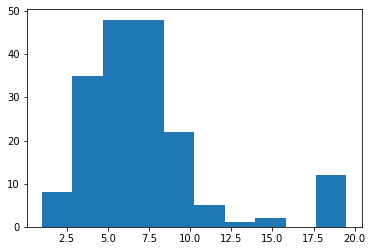

In [8]:
# read all LA molecules in smiles foramt
LA_smiles, zinc_smiles = fps_som.get_LA_zinc_data(multiplier=10)
        
LA_rewards = []
for sm in LA_smiles:
    LA_rewards.append(fps_som.som_reward(sm, radius=1))
    
    
plt.hist(LA_rewards)

(array([  55.,  104.,   50.,   59.,  266., 1016.,  163.,   74.,   20.,
           3.]),
 array([-15. , -12.9, -10.8,  -8.7,  -6.6,  -4.5,  -2.4,  -0.3,   1.8,
          3.9,   6. ]),
 <BarContainer object of 10 artists>)

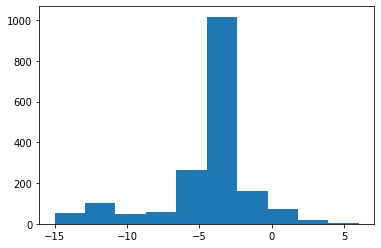

In [9]:
# read all zinc molecules in smiles format
zinc_rewards = []
for sm in zinc_smiles:
    zinc_rewards.append(fps_som.som_reward(sm, radius=1))

plt.hist(zinc_rewards)

In [10]:
LA_wrong = [r for r in LA_rewards if r < 0 ]
print(len(LA_wrong), len(LA_rewards), len(LA_wrong)/len(LA_rewards))

zinc_wrong = [r for r in zinc_rewards if r > 0 ]
print(len(zinc_wrong), len(zinc_rewards), len(zinc_wrong)/len(zinc_rewards))


0 181 0.0
42 1810 0.023204419889502764


In [11]:
import numpy as np
print(np.mean(LA_wrong), np.mean(zinc_wrong))

nan 1.869047619047619


/home/chenyang/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/chenyang/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [13]:
fps_som.smiles_set

{'Cc1cc(C)n2nc(C(=O)Nc3ccccc3-n3ccnc3)nc2n1',
 'CCN(C(=O)CS(=O)(=O)c1nc2ccccc2[nH]1)c1ccccc1',
 'CC1CCCC(CNc2ccn(CC(F)F)n2)C1',
 'N#CC(C(=O)C1(c2ccc(F)cc2)CCOCC1)c1ccccn1',
 'CN(C(=O)c1ccc(F)cc1)C(C#N)c1ccccc1F',
 'O=C(CSc1nc(C(F)(F)F)cc(=O)[nH]1)Nc1ccc(F)cc1',
 'COCC(=O)N(C)Cc1nc2ccsc2c(=O)[nH]1',
 'CC(C)Oc1ccccc1NCC(=O)NCc1ccc2c(c1)OCO2',
 'Cc1noc(C)c1CNc1ccccc1C(=O)NC1CC1',
 'CCOC(=O)CC(C)CNC(=O)c1cc(=O)[nH]c2ccccc12',
 'CNC(=O)c1ccc(CNC(C)Cc2ccccc2F)cc1',
 'CC1CCCN(S(=O)(=O)NC2CCCCC2)C1',
 'CN1CCN(C(=O)C2CCCN(S(C)(=O)=O)C2)CC1',
 'CCOC(C)C(=O)N=c1[nH]c2cc(Br)ccc2n1CC',
 'Cc1ccc(S(=O)(=O)NC2CCCC(C)C2)s1',
 'O=C(C1COc2ccccc21)N1CCc2cc(F)ccc2C1',
 'CC(C)C(NC(=O)NC(C)C(C)CO)c1ccc2c(c1)OCCO2',
 'COC(=O)c1ccc(N)c(Oc2ccccc2OC)c1',
 'CCCn1c(=O)c2c(nc3n(CC)c(C)cn23)n(C)c1=O',
 'COc1ccc(F)c(NCC(=O)Nc2cc(C)nn2C(C)(C)C)c1',
 'CC(C)c1nc2c(NC(=O)c3cccc(Cl)c3)cccn2n1',
 'COc1ccc(C(Cc2ccncn2)Oc2nc(C)cc(C)n2)cc1',
 'CC1NCc2ccccc2C1C(=O)N1CCN(C)CC1',
 'COc1ccc(-c2cnn3c(=O)c(C(C)C)c(C)[nH]c23)cc1OC',